In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Определение нечетких множеств для медицинской диагностики
fuzzy_sets = {
    "Температура тела": {
        "низкая": (34, 35, 36),
        "нормальная": (36, 36.5, 37.5),
        "высокая": (37.5, 38, 39),
        "критическая": (39, 40, 41)
    },
    "Уровень боли": {
        "нет боли": (0, 1, 2),
        "легкая": (1, 3, 5),
        "средняя": (4, 6, 8),
        "сильная": (7, 9, 10)
    }
}

In [3]:
# Функция для создания треугольной функции принадлежности
def triangular_membership(x, a, b, c):
    if x < a or x > c:
        return 0
    elif a <= x <= b:
        return (x - a) / (b - a)
    elif b < x <= c:
        return (c - x) / (c - b)
    return 0

# Функция для отображения принадлежности объекта к нечетким множествам
def display_membership(category, value):
    print(f"\nКатегория: {category}")
    for label, (a, b, c) in fuzzy_sets[category].items():
        membership = triangular_membership(value, a, b, c)
        print(f"{label.capitalize()}: степень принадлежности = {membership:.2f}")

In [7]:
def plot_fuzzy_set(category, value):
    # Определяем диапазон значений для x в зависимости от категории
    x_values = np.linspace(0, 42, 500) if category == "Температура тела" else np.linspace(0, 10, 500)
    plt.figure(figsize=(10, 6))
    
    # Рисуем треугольные функции для всех категорий
    for label, (a, b, c) in fuzzy_sets[category].items():
        y_values = [triangular_membership(x, a, b, c) for x in x_values]
        plt.plot(x_values, y_values, label=label.capitalize())
        
        # Вычисляем степень принадлежности введенного значения
        membership_value = triangular_membership(value, a, b, c)
        
        # Если степень принадлежности ненулевая, выделяем точку
        if membership_value > 0:
            plt.plot(value, membership_value, 'ro')  # Красная точка на графике
            plt.text(value, membership_value, f'({value}, {membership_value:.2f})', color='red')

    # Добавляем вертикальную линию для введенного значения
    plt.axvline(x=value, color='gray', linestyle='--', label=f'Введённое значение: {value}')
    
    # Настройки графика
    plt.title(f'Нечеткое множество: {category}')
    plt.xlabel('Значение')
    plt.ylabel('Степень принадлежности')
    plt.legend()
    plt.grid(True)
    plt.show()



Выберите категорию для анализа:
1 - Температура тела
2 - Уровень боли
0 - Выход


Ваш выбор:  1
Введите значение для категории 'Температура тела':  2



Категория: Температура тела
Низкая: степень принадлежности = 0.00
Нормальная: степень принадлежности = 0.00
Высокая: степень принадлежности = 0.00
Критическая: степень принадлежности = 0.00


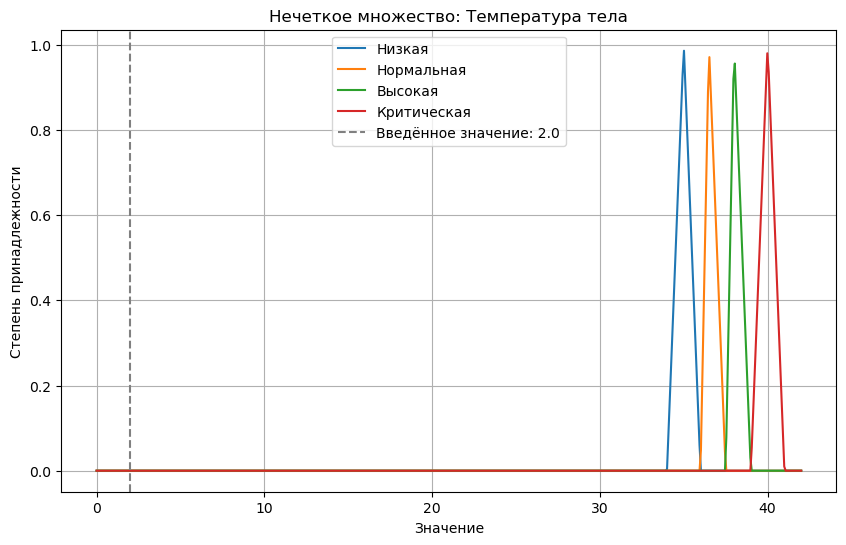


Выберите категорию для анализа:
1 - Температура тела
2 - Уровень боли
0 - Выход


Ваш выбор:  1
Введите значение для категории 'Температура тела':  5



Категория: Температура тела
Низкая: степень принадлежности = 0.00
Нормальная: степень принадлежности = 0.00
Высокая: степень принадлежности = 0.00
Критическая: степень принадлежности = 0.00


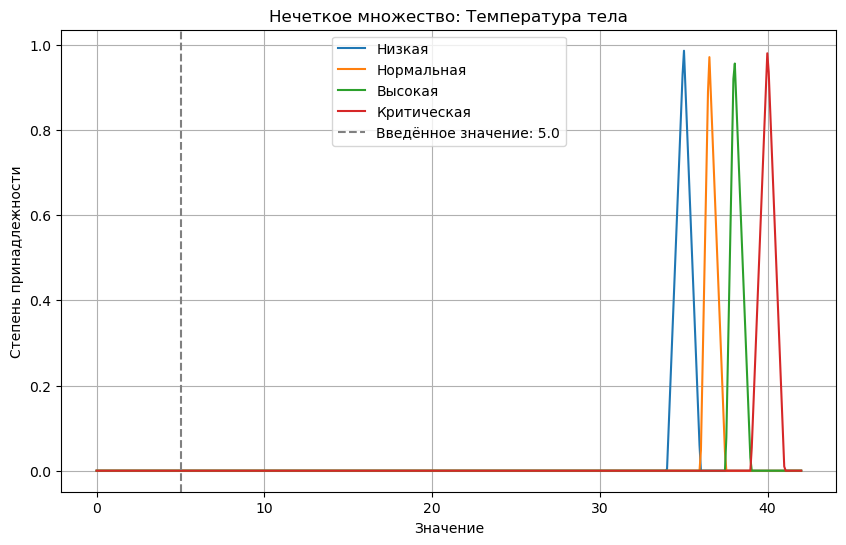


Выберите категорию для анализа:
1 - Температура тела
2 - Уровень боли
0 - Выход


Ваш выбор:  2
Введите значение для категории 'Уровень боли':  5



Категория: Уровень боли
Нет боли: степень принадлежности = 0.00
Легкая: степень принадлежности = 0.00
Средняя: степень принадлежности = 0.50
Сильная: степень принадлежности = 0.00


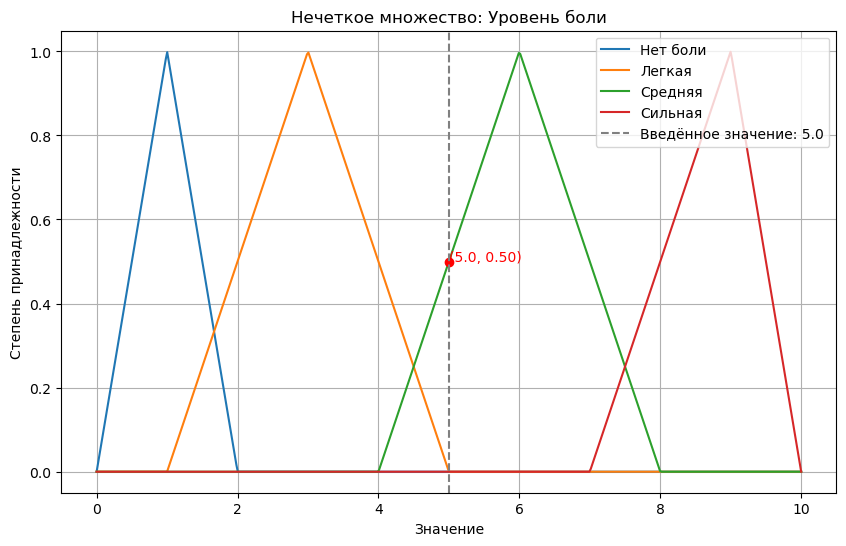


Выберите категорию для анализа:
1 - Температура тела
2 - Уровень боли
0 - Выход


In [ ]:
# Основная часть программы
while True:
    print("\nВыберите категорию для анализа:")
    print("1 - Температура тела")
    print("2 - Уровень боли")
    print("0 - Выход")
    choice = input("Ваш выбор: ")
    
    if choice == '0':
        break
    elif choice == '1':
        category = "Температура тела"
    elif choice == '2':
        category = "Уровень боли"
    else:
        print("Некорректный выбор. Попробуйте снова.")
        continue
    
    try:
        value = float(input(f"Введите значение для категории '{category}': "))
        display_membership(category, value)
        plot_fuzzy_set(category, value)
    except ValueError:
        print("Пожалуйста, введите числовое значение.")